### Disciplina: Projeto Data Warehouse

### PROFª: Juliana Forin Pasquini Martinez

#### ALUNOS: Henrique Zucareli Santiago, Marcelo Pereira Fernandes

#### OBJETIVO: Analisar vendas de uma rede de lojas

Baixar dados de: https://drive.google.com/file/d/1snkXBakN3Yo_imKamUCtdz2ZYpIXF3KD/view?usp=sharing

### Importando panda

In [15]:
#importando panda
import pandas as pd

### Importanto Base de dados do arquivo csv

In [16]:
#importandobase de dados arquivo csv
data = pd.read_csv('Vendas.csv', encoding = 'Latin 1', sep = ';')

### Especificando o Cabeçalho do Arquivo

In [17]:
#Especificando o cabeçalho do arquivo
data = pd.read_csv('Vendas.csv', encoding = 'Latin 1', sep = ';', header = 0)

### Selecionando Colunas

In [18]:
data = pd.read_csv('Vendas.csv', encoding = 'Latin 1', sep = ';', usecols = ['COD_VENDA','DATA', 'ID_LOJA', 'PRODUTO', 'QUANTIDADE','VR_UNIT', 'VR_FINAL'])

### Visualização da tabela de Dados

In [19]:
data.head()

,COD_VENDA,DATA,ID_LOJA,PRODUTO,QUANTIDADE,VR_UNIT,VR_FINAL
0,1,01/01/2019,Iguatemi Esplanada,Sapato Estampa,1,358.0,358.0
1,1,01/01/2019,Iguatemi Esplanada,Camiseta,2,180.0,360.0
2,1,01/01/2019,Iguatemi Esplanada,Sapato Xadrez,1,368.0,368.0
3,2,02/01/2019,Norte Shopping,Relógio,3,200.0,600.0
4,2,02/01/2019,Norte Shopping,Chinelo Liso,1,71.0,71.0


### Importando biblioteca seaborn

In [20]:
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

### Soma de vendas de todas as lojas

In [21]:
venda_total = round(data.VR_FINAL.sum(),2)
display(venda_total)

41877063.0

### Soma de vendas de cada loja

In [22]:
venda_loja = data[['ID_LOJA', 'VR_FINAL']].groupby('ID_LOJA').sum()
venda_loja = venda_loja.sort_values(by='ID_LOJA', ascending=False)
display(venda_loja)

,VR_FINAL
ID_LOJA,
Shopping Vila Velha,1731167.0
Shopping União de Osasco,1663770.0
Shopping SP Market,1721763.0
Shopping Recife,1624879.0
Shopping Morumbi,1586444.0
Shopping Midway Mall,1590441.0
Shopping Iguatemi Fortaleza,1674824.0
Shopping Ibirapuera,1635060.0
Shopping Eldorado,1648111.0


### Soma da quantidade de vendas de cada loja

In [23]:
quantidade_loja = data[['ID_LOJA', 'QUANTIDADE']].groupby('ID_LOJA').sum()
quantidade_loja = quantidade_loja.sort_values(by='ID_LOJA', ascending=False)
display(quantidade_loja)

,QUANTIDADE
ID_LOJA,
Shopping Vila Velha,9224
Shopping União de Osasco,8730
Shopping SP Market,8927
Shopping Recife,8581
Shopping Morumbi,8508
Shopping Midway Mall,8206
Shopping Iguatemi Fortaleza,8629
Shopping Ibirapuera,8723
Shopping Eldorado,8719


### Média de valor de cada venda em cada loja

In [24]:
venda_media = (venda_loja['VR_FINAL'] / quantidade_loja['QUANTIDADE']).to_frame()
venda_media = venda_media.rename(columns={0: 'VENDA_MEDIA'})
venda_media = venda_media.sort_values(by='VENDA_MEDIA', ascending=False)
display(venda_media)

,VENDA_MEDIA
ID_LOJA,
Iguatemi Esplanada,198.098019
Iguatemi Campinas,197.248909
Bourbon Shopping SP,194.754598
Parque Dom Pedro Shopping,194.519552
Rio Mar Recife,194.377299
Shopping Iguatemi Fortaleza,194.092479
Shopping Midway Mall,193.814404
Center Shopping Uberlândia,193.453228
Ribeirão Shopping,193.441586


### Gráfico de barra com o comparativo de vendas de cada loja

<AxesSubplot:title={'center':'VENDA POR LOJA'}, xlabel='ID_LOJA'>

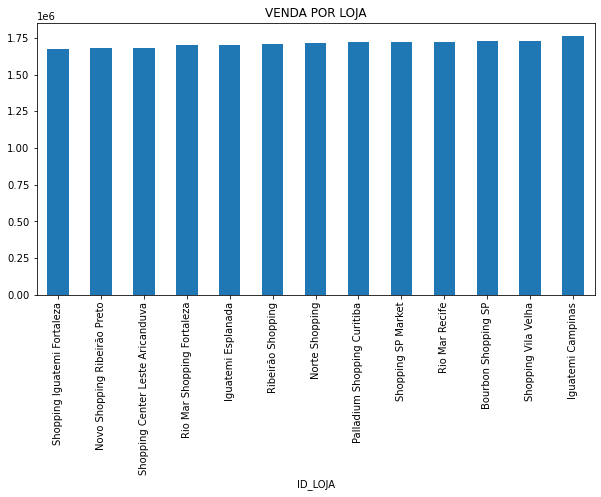

In [25]:
venda_loja.groupby('ID_LOJA')['VR_FINAL'].sum().sort_values().tail(13).plot(title='VENDA POR LOJA', kind='bar', figsize=(10,5))

### Gráfico de pizza com o comparativo de vendas de cada loja

<AxesSubplot:title={'center':'VENDA POR LOJA'}, ylabel='VR_FINAL'>

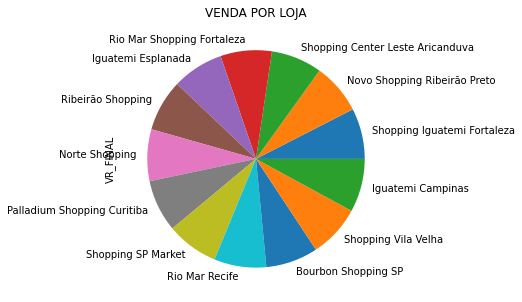

In [26]:
venda_loja.groupby('ID_LOJA')['VR_FINAL'].sum().sort_values().tail(13).plot(title='VENDA POR LOJA', kind='pie', figsize=(10,5))

### Dados da quantidade de cada produto vendido

In [27]:
produto_vendido = data[['PRODUTO', 'QUANTIDADE']].groupby('PRODUTO').sum()
produto_vendido = produto_vendido.sort_values(by='QUANTIDADE', ascending=False)
display(produto_vendido)

,QUANTIDADE
PRODUTO,
Bermuda Linho,2024
Mochila Liso,2013
Cueca,1984
Casaco Liso,1976
Relógio Listrado,1951
...,...
Meia Listrado,1711
Gorro Estampa,1698
Meia Xadrez,1693


### Soma do valor de vendas de cada produto

In [28]:
produto_faturamento = data[['PRODUTO', 'VR_FINAL']].groupby('PRODUTO').sum()
produto_faturamento = produto_faturamento.sort_values(by='VR_FINAL', ascending=False)
display(produto_faturamento)

,VR_FINAL
PRODUTO,
Terno Listrado,1308814.0
Terno Linho,1305750.0
Terno Liso,1279440.0
Terno Xadrez,1240750.0
Terno Estampa,1237618.0
...,...
Meia Estampa,94650.0
Meia Xadrez,69413.0
Meia Liso,68210.0
